In [5]:
# all the f'ing imports
import scipy.io as sio
import os,sys
sys.path.append('/home/mayank/work/pyutils')
import myutils
import re
from stephenHeadConfig import conf as conf
import shutil

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import math
import lmdb
import caffe
from random import randint,sample
import pickle
import h5py


import mpld3
mpld3.enable_notebook()

import multiResData
reload(multiResData)

multiResData.createDB(conf)

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


AttributeError: 'module' object has no attribute 'createDB'

In [2]:
from stephenHeadConfig import sideconf as conf
import multiResData
reload(multiResData)

multiResData.createFullTFRecord(conf)

Done 0 of 278 movies, count:3 val:0
Done 1 of 278 movies, count:6 val:0
Done 2 of 278 movies, count:8 val:0
Done 3 of 278 movies, count:9 val:0
Done 4 of 278 movies, count:9 val:0
Done 5 of 278 movies, count:11 val:0
Done 6 of 278 movies, count:14 val:0
Done 7 of 278 movies, count:17 val:0
Done 8 of 278 movies, count:17 val:0
Done 9 of 278 movies, count:17 val:0
Done 10 of 278 movies, count:20 val:0
Done 11 of 278 movies, count:23 val:0
Done 12 of 278 movies, count:26 val:0
Done 13 of 278 movies, count:26 val:0
Done 14 of 278 movies, count:26 val:0
Done 15 of 278 movies, count:29 val:0
Done 16 of 278 movies, count:31 val:0
Done 17 of 278 movies, count:34 val:0
Done 18 of 278 movies, count:34 val:0
Done 19 of 278 movies, count:34 val:0
Done 20 of 278 movies, count:37 val:0
Done 21 of 278 movies, count:40 val:0
Done 22 of 278 movies, count:42 val:0
Done 23 of 278 movies, count:44 val:0
Done 24 of 278 movies, count:44 val:0
Done 25 of 278 movies, count:47 val:0
Done 26 of 278 movies, coun

In [ ]:
# convert from dropbox to the newer location
import pickle
with open('cacheHead/valdata_dropbox','rb') as f:
    isval,localdirs,seldirs = pickle.load(f)
localdirs[0][35:]
ll = ['/home/mayank/work/PoseEstimationData' + x[35:] for x in localdirs]
ll[0]
with open('cacheHead/valdata','wb') as f:
    pickle.dump([isval,ll,seldirs],f)

In [1]:
# copy the validation file from front view to side view
import pickle
import os
import re

from stephenHeadConfig import conf
conforig = conf
from stephenHeadConfig import sideconf as conf
outfile = os.path.join(conforig.cachedir,conforig.valdatafilename)
assert os.path.isfile(outfile),"valdatafile doesn't exist"

with open(outfile,'r') as f:
    isval,localdirs,seldirs = pickle.load(f)

newdirs = []    
for ndx,l in enumerate(localdirs):
    if ndx == 19:
        newdirs.append('/home/mayank/work/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0023/fly_0023_trial_005/C001H001S0002/C001H001S0002.avi')
    else:
        newdirs.append(re.sub('C002','C001',l,count = 3))
#     print('%d %d:%s' % (ndx,os.path.isfile(newdirs[-1]),newdirs[-1]))

outfile = os.path.join(conf.cachedir,conf.valdatafilename)

with open(outfile,'w') as f:
    pickle.dump([isval,newdirs,seldirs],f)
    

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import conf as conf
import tensorflow as tf

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=False,trainType=1)

Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 56595.695,218.7, Val = 56319.518,236.9
Saved state to /home/mayank/work/poseEstimation/cacheHeadSide/headBase-0
Iter 30, Train = 726.573,114.9, Val = 714.184,127.2
Iter 60, Train = 286.280,87.0, Val = 298.782,23.4
Iter 90, Train = 252.174,24.4, Val = 256.218,24.3
Iter 120, Train = 246.197,35.3, Val = 239.654,15.0
Iter 150, Train = 228.941,22.8, Val = 234.814,16.2
Iter 180, Train = 209.206,20.3, Val = 217.041,17.5
Iter 210, Train = 213.177,17.7, Val = 220.808,18.7
Iter 240, Train = 219.598,21.1, Val = 240.358,17.5
Iter 270, Train = 191.990,21.0, Val = 172.036,17.2
Iter 300, Train = 210.271,22.4, Val = 171.264,20.9
Iter 330, Train = 191.118,24.2, Val = 142.061,13.0
Iter 360, Train = 186.709,18.2, Val = 137.726,12.5
Iter 390, Train = 116.906,8.8, Val = 141.810,13.0
Iter 420, Train = 112.783,10.8, Val = 146.262,14.6
Iter 450, Train = 110.919,8.5, Val = 141.8

In [3]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf
import os

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.baseTrain(restore=False)

Not loading base variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 46672.203,239.0, Val = 45781.742,214.0
Saved state to /home/mayank/work/poseEstimation/cacheHeadSide/headBase-0
Iter 30, Train = 626.803,205.1, Val = 605.415,84.5
Iter 60, Train = 285.100,107.5, Val = 287.469,45.3
Iter 90, Train = 260.764,47.9, Val = 256.356,29.3
Iter 120, Train = 256.264,26.5, Val = 266.861,26.9
Iter 150, Train = 266.598,21.1, Val = 292.316,27.8
Iter 180, Train = 237.358,29.1, Val = 232.008,24.3
Iter 210, Train = 230.720,24.8, Val = 244.522,27.2
Iter 240, Train = 220.740,22.4, Val = 285.729,18.1
Iter 270, Train = 204.158,19.4, Val = 176.664,14.5
Iter 300, Train = 203.210,19.2, Val = 170.315,16.0
Iter 330, Train = 155.272,13.1, Val = 155.215,10.2
Iter 360, Train = 134.130,9.3, Val = 164.491,10.0
Iter 390, Train = 148.947,12.7, Val = 160.155,12.1
Iter 420, Train = 125.610,9.0, Val = 147.456,11.0
Iter 450, Train = 148.879,12.4, Val = 163.3

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf
import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=True,trainType=1)

Padding base prediction by 6. Filter shape:140, Base shape:128
Loading base from /home/mayank/work/poseEstimation/cacheHeadSide/headBase-5000
Parameters that dont match for mrf:
Loading mrf variables from /home/mayank/work/poseEstimation/cacheHeadSide/headMRF-4500
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Initializing variable:mrf/mrf/weights/Adam:0
Initializing variable:mrf/mrf/weights/Adam_1:0
Initializing variable:mrf/mrf/biases/Adam:0
Initializing variable:mrf/mrf/biases/Adam_1:0
Iter 4530, Train = 80.431,10.1, Val = 73.887,8.9 (150.6,130.0),(15.3,10.7)
Iter 4560, Train = 78.273,8.9, Val = 73.055,8.2 (164.6,147.9),(13.9,11.8)
Iter 4590, Train = 77.375,9.7, Val = 53.133,6.4 (175.5,138.9),(14.8,11.3)
Iter 4620, Train = 75.529,7.9, Val = 54.779,7.0 (161.7,158.8),(12.2,13.2)
Iter 4650, Train = 58.539,7.3, Val = 63.418,7.9 (95.0,151.4),(7.9,12.2)
Iter 4680, Train = 55.534,6.5, Val = 69.408,8.2 (104.3,140.8),(8.4,11.8)
Iter 4710, Train = 70.756,8.5, Val = 54

In [1]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

tf.reset_default_graph()
pobj = PoseTrain.PoseTrain(conf)
pobj.mrfTrain(restore=True)

Padding base prediction by 6. Filter shape:140, Base shape:128
Loading base from /home/mayank/work/poseEstimation/cacheHeadSide/headBase-5000
Not loading mrf variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 204.577,16.0, Val = 204.476,11.0 (419.2,479.6),(8.2,8.2)
Saved state to /home/mayank/work/poseEstimation/cacheHeadSide/headMRF-0
Iter 30, Train = 153.579,14.9, Val = 90.599,9.1 (531.8,484.6),(10.4,7.7)
Iter 60, Train = 141.256,12.0, Val = 103.517,10.8 (514.4,505.5),(10.1,10.1)
Iter 90, Train = 135.342,12.3, Val = 104.223,10.1 (455.8,504.1),(8.4,8.6)
Iter 120, Train = 121.902,9.7, Val = 115.365,11.7 (432.7,494.4),(9.2,9.0)
Iter 150, Train = 133.727,12.8, Val = 113.195,11.9 (469.0,495.4),(9.9,9.4)
Iter 180, Train = 94.661,8.4, Val = 95.902,10.2 (499.6,485.2),(7.1,8.6)
Iter 210, Train = 160.667,14.4, Val = 105.295,10.7 (419.7,477.1),(11.6,8.8)
Iter 240, Train = 111.030,9.6, Val = 112.096,11.3 (373.0,478.3),(7.9,9.6)
It

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [ ]:
import PoseTrain
reload(PoseTrain)
from stephenHeadConfig import sideconf as conf
import tensorflow as tf

pobj = PoseTrain.PoseTrain(conf)
pobj.acTrain(restore=True)

In [4]:
import PoseTrain
reload(PoseTrain)
import tensorflow as tf
from stephenHeadConfig import conf as conf
import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
tf.reset_default_graph()
conf.useMRf = True
pobj = PoseTrain.PoseTrain(conf)

pobj.fineTrain(restore=False)

Parameters that dont match for base:
useMRf doesnt match
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
Parameters that dont match for mrf:
useMRf doesnt match
Loading mrf variables from /home/mayank/work/poseEstimation/cacheHead/headMRF-6000
Not loading fine variables. Initializing them
Initializing variable:beta1_power:0
Initializing variable:beta2_power:0
Iter 0, Train = 13921.200,24.9, Val = 13858.845,24.4 (MRF:23.1,19.2,5.6,5.3) (Base:108.3,99.7,6.0,5.6)
Saved state to /home/mayank/work/poseEstimation/cacheHead/headFine-0
Iter 30, Train = 1548.444,26.9, Val = 1528.566,26.5 (MRF:19.9,17.5,4.7,4.7) (Base:106.0,96.6,4.9,4.7)
Iter 60, Train = 149.255,24.7, Val = 169.945,28.9 (MRF:15.6,19.1,4.2,5.5) (Base:82.3,101.8,3.8,5.6)
Iter 90, Train = 88.759,25.5, Val = 96.539,23.6 (MRF:21.2,18.6,5.1,5.1) (Base:105.8,95.8,5.5,5.5)
Iter 120, Train = 85.111,23.3, Val = 89.590,23.1 (MRF:15.0,22.2,4.4,5.1) (Base:85.6,110.7,4.8,5.6)
Iter 150, Train = 79.974,17.2

In [ ]:
ll = np.max(berr,1)

zz = np.argwhere(ll>15)
from matplotlib import cm
fig = plt.figure(figsize=(8,5))
for idx in range(zz.shape[0]):
    img = zz[idx,0]

    fig.clf()
    ax12 = fig.add_subplot(1,1,1)
    ax12.imshow(all_images[img][0,:,:,0],cmap=cm.gray)

    all_locs = np.zeros([5,3,2])
    for ondx in range(conf.n_classes):
        maxndx = np.argmax(basepred[img][0,:,:,ondx])
        predloc = np.array(np.unravel_index(maxndx,basepred[img].shape[1:3]))
        predloc = predloc * conf.pool_scale 
        all_locs[ondx,0,:] = predloc
        maxndx = np.argmax(mrfpred[img][0,:,:,ondx])
        mrfloc = np.array(np.unravel_index(maxndx,mrfpred[img].shape[1:3]))
        mrfloc = mrfloc * conf.pool_scale 
        all_locs[ondx,1,:] = predloc
        maxndx = np.argmax(finepred[img][0,:,:,ondx])
        finepredloc = (np.array(np.unravel_index(maxndx,finepred[img].shape[1:3]))-conf.fine_sz/2)
        all_locs[ondx,2,:]= predloc+finepredloc


    plt.scatter(labels[img][0,:,0]/conf.rescale,labels[img][0,:,1]/conf.rescale,
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,0,1],all_locs[:,0,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.2,
                linewidths=0,edgecolors='face',s=5)
    plt.scatter(all_locs[:,2,1],all_locs[:,2,0],
                c=np.linspace(0,1,conf.n_classes),hold=True,cmap=cm.jet,alpha=0.6,
                linewidths=0,edgecolors='face',s=5)
    outname = 'results/headBaseAndFine%d.png'%idx
#     plt.savefig(outname,dpi=500)
#     raw_input('Press Enter')


In [ ]:
# create a list of movies for stephen -- May 23 2016
import os
with open("/groups/branson/bransonlab/mayank/PoseEstimationData/Stephen/folders2track.txt", "r") as text_file:
    movies = text_file.readlines()
movies = [x.rstrip() for x in movies]

import glob
sdir = movies[0::2]    
fdir = movies[1::2]
fmovies = []
smovies = []
for ndx,ff  in enumerate(sdir):
    kk = glob.glob(ff+'/*_c.avi')
    if len(kk) is not 1:
        print ff
        continue
    smovies.append(kk[0])
    kk = glob.glob(fdir[ndx]+'/*_c.avi')
    fmovies += kk
        
print smovies[0:3]
print fmovies[0:3]
print len(smovies)
print len(fmovies)
for ff in smovies+fmovies:
    if not os.path.isfile(ff):
        print ff

In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
import cv2
from cvc import cvc
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# For SIDE
# from stephenHeadConfig import sideconf as conf
# conf.useMRF = False
# outtype = 1
# extrastr = '_side'
# redo = False

# For FRONT
from stephenHeadConfig import conf as conf
conf.useMRF = False
outtype = 1
extrastr = ''
redo = False

# conf.batch_size = 1
tf.reset_default_graph()

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)


_,valmovies = multiResData.getMovieLists(conf)
valmovies = valmovies[45:55]
valmovies = ['/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi']
# for ndx in range(len(valmovies)):
#     valmovies[ndx] = '/groups/branson/bransonlab/mayank/' + valmovies[ndx][17:]
# for ndx in [0,3,-3,-1]:

# valmovies = ['/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly138/fly138_trial4/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial1/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial2/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial3/C001H001S0001/C001H001S0001_c.avi',
#              '/groups/branson/bransonlab/projects/flyHeadTracking/ExamplefliesWithNoTrainingData/fly163/fly163_trial4/C001H001S0001/C001H001S0001_c.avi',
#             ]
# for ndx in range(len(valmovies)):
# valmovies = smovies    
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/home/mayank/temp/stephenOut/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        

    if not os.path.isfile(valmovies[ndx]):
        continue
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cvc.FRAME_HEIGHT))
    width = int(cap.get(cvc.FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

Parameters that dont match for base:
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
....................
....................
....................
....................
....................
....................
....................
....................
....................
.

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/numpy-1.12.0.dev0+9cfdb21-py2.7-linux-x86_64.egg/numpy/ma/core.py:3113: FutureWarning: Currently, slicing will try to return a view of the data, but will ret

.

NameError: name 'orig_crop_locp_locp_loc' is not defined

In [11]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import conf as conf
import PoseTrain
import sys


# conf = sideconf
conf.batch_size = 1
conf.useMRF = False
outtype = 1

tf.reset_default_graph()
self = PoseTrain.PoseTrain(conf)
self.createPH()
self.createFeedDict()
self.feed_dict[self.ph['phase_train_base']] = False
self.feed_dict[self.ph['keep_prob']] = 0.5
self.trainType = 1
doBatchNorm = self.conf.doBatchNorm

sess = tf.InteractiveSession()

with tf.variable_scope('base'):
    self.createBaseNetwork(doBatchNorm)
self.openDBs()
self.createBaseSaver()


self.createCursors(sess)
self.updateFeedDict(self.DBType.Train,sess=sess,distort=True)
self.restoreBase(sess,restore=True)
self.initializeRemainingVars(sess)


numex = 4086
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
predDists = np.zeros([numex,])

for count in range(numex):
    self.updateFeedDict(self.DBType.Train,sess=sess,distort=False)
    curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = self.locs[0,:,:]
    ims[count,:,:] = self.xs[0,0,:,:]
    tt1 = self.computePredDist(sess,self.basePred)
    predDists[count] = tt1.mean()
    if count%20==19:
        sys.stdout.write('.')
    if count%200==199:
        sys.stdout.write('\n')


Parameters that dont match for base:
batch_size doesnt match
brange doesnt match
crange doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-10000
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
....

In [1]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import conf as conf
import PoseTrain
import sys
import math


# conf = sideconf
conf.batch_size = 4
conf.useMRF = False
outtype = 1

tf.reset_default_graph()
self = PoseTrain.PoseTrain(conf)
self.createPH()
self.createFeedDict()
self.feed_dict[self.ph['phase_train_base']] = False
self.feed_dict[self.ph['keep_prob']] = 0.5
self.trainType = 1
doBatchNorm = self.conf.doBatchNorm

sess = tf.InteractiveSession()

with tf.variable_scope('base'):
    self.createBaseNetwork(doBatchNorm)
self.cost = tf.reduce_sum( (self.basePred-self.ph['y'])**2,axis=[1,2,3])/2
self.openDBs()
self.createBaseSaver()


self.createCursors(sess)
self.updateFeedDict(self.DBType.Train,sess=sess,distort=True)
self.restoreBase(sess,restore=True)
self.initializeRemainingVars(sess)


numex = 4086
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
predDists = np.zeros([numex,])
loss = np.zeros([numex,])
info = []

bs = conf.batch_size
for count in range(int(math.floor(numex/bs))):
    self.updateFeedDict(self.DBType.Train,sess=sess,distort=False)
    curpred,ll = sess.run([self.basePred,self.cost],feed_dict = self.feed_dict)
    all_preds[count*bs:(count+1)*bs,:,:,:,0] = curpred
    predLocs[count*bs:(count+1)*bs,:,:,0] = PoseTools.getBasePredLocs(curpred,conf)[:,:,:]
    predLocs[count*bs:(count+1)*bs,:,:,1] = self.locs[:,:,:]
    ims[count*bs:(count+1)*bs,:,:] = self.xs[:,0,:,:]
    loss[count*bs:(count+1)*bs] = ll
    tt1 = self.computePredDist(sess,self.basePred)
    predDists[count*bs:(count+1)*bs] = tt1.mean(axis=1)
    info = info+self.info
    if count%20==19:
        sys.stdout.write('.')
    if count%200==199:
        sys.stdout.write('\n')
print 'Done'

Parameters that dont match for base:
brange doesnt match
crange doesnt match
selpts
New: [0 1 2 3 4]
Old: [0 1 2 3 4]
Loading base variables from /home/mayank/work/poseEstimation/cacheHead/headBase-40000
..........
..........
..........
..........
..........
.Done


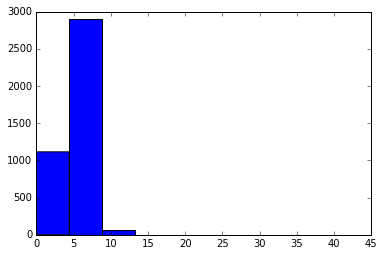

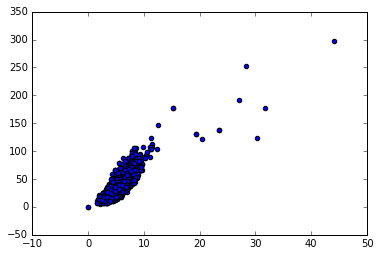

In [3]:
import datetime
fig = plt.figure()
plt.hist(predDists)
fig = plt.figure()
plt.scatter(predDists,loss)
ts = datetime.datetime.now().strftime('%Y%m%d%H%M')
fig.savefig('temp/lossVsDist_headFrontBase'+ts+'.png')

<IPython.core.display.Javascript object>


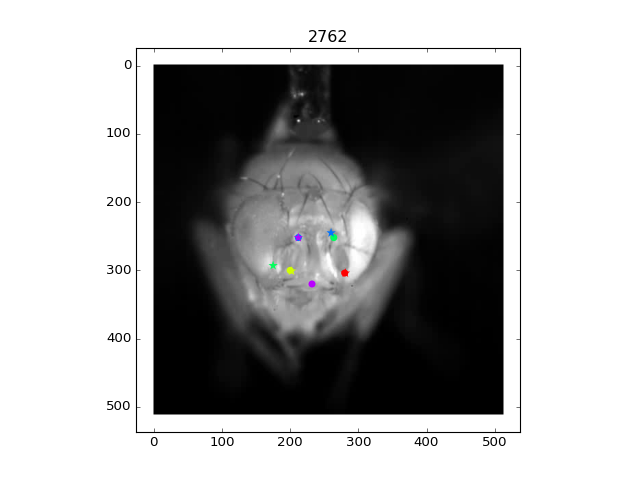

<IPython.core.display.Javascript object>


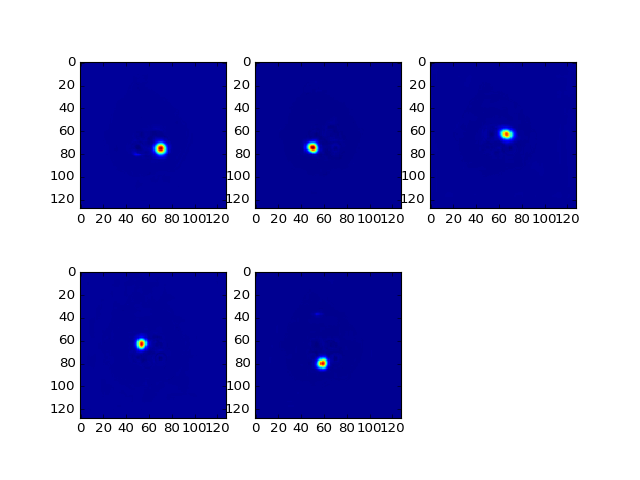

In [8]:
kk = np.where(loss>150)[0]
curk = np.random.choice(kk)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ims[curk,:,:],cmap='gray',vmin=0,vmax=255)
ax.scatter(predLocs[curk,:,0,0],predLocs[curk,:,1,0], #hold=True,
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=40, linewidths=0, edgecolors='face')
ax.scatter(predLocs[curk,:,0,1],predLocs[curk,:,1,1], marker = '*', #hold=True,
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=80, linewidths=0, edgecolors='face')
ax.set_title('{}'.format(curk))
# print predLocs[curk,:,:,:]

fig = plt.figure()
for ndx in range(5):
    ax = fig.add_subplot(2,3,ndx+1)
    pp = all_preds[curk,:,:,ndx,0]
    pp[0,0] = -1
    pp[0,1] = 1
    ax.imshow(pp,interpolation='Nearest')


In [16]:
import h5py
import multiResData
L = h5py.File(conf.labelfile,'r')
pts = np.array(L['labeledpos'])
localdirs =  [u''.join(unichr(c) for c in L[jj]) for jj in L['movieFilesAll'][0,:]]
len(localdirs)


790

In [112]:
olocs = []
expidx = []
ts = []
for ndx,dirname in enumerate(localdirs):
    
    curpts = np.array(L[pts[0,ndx]])
    curdir = os.path.dirname(localdirs[ndx])
    cloc = conf.cropLoc[(512,768)]
    
    frames = np.where(np.invert( np.any(np.isnan(curpts[:,:,:]),axis=(1,2))))[0]
    for fnum in frames:
        nptsPerView = np.array(L['cfg']['NumLabelPoints'])[0,0]
        pts_st = int(conf.view*nptsPerView)
        selpts = pts_st + conf.selpts
        curloc = curpts[fnum,:,selpts]
        curloc[:,0] = curloc[:,0] - cloc[1] - 1 
        curloc[:,1] = curloc[:,1] - cloc[0] - 1
        curloc = curloc.clip(min=0,max=[conf.imsz[1]+7,conf.imsz[0]+7])
        olocs.append(curloc)
        expidx.append(ndx)
        ts.append(fnum)
    

In [116]:
olocs = np.array(olocs)
olocs = np.round(olocs)
expidx = np.array(expidx)
ts = np.array(ts)
print olocs.shape,expidx.shape,ts.shape
kk = np.where(loss>150)[0]
curk = np.random.choice(kk)
curl = predLocs[curk,:,:,1]
d2curk = np.sum(np.abs( olocs+1-curl),axis=(1,2))
ff = np.argmin(d2curk)
print curk, ff, d2curk[ff]
print curl
print olocs[ff,:,:]+1
curl[:,0] = 512-curl[:,0]
d2curk = np.sum(np.abs( olocs+1-curl),axis=(1,2))
ff = np.argmin(d2curk)
print curk, ff, d2curk[ff]
print curl
print olocs[ff,:,:]+1

(4084, 5, 2) (4084,) (4084,)
2037 2041 0.0
[[ 192.  291.]
 [ 114.  261.]
 [ 150.  217.]
 [ 210.  238.]
 [ 154.  309.]]
[[ 192.  291.]
 [ 114.  261.]
 [ 150.  217.]
 [ 210.  238.]
 [ 154.  309.]]
2037 1096 306.0
[[ 320.  291.]
 [ 398.  261.]
 [ 362.  217.]
 [ 302.  238.]
 [ 358.  309.]]
[[ 361.  276.]
 [ 280.  291.]
 [ 332.  227.]
 [ 283.  235.]
 [ 322.  313.]]


In [123]:
kk = np.where(loss>150)[0]
print kk
curk = np.random.choice(kk)
curl = predLocs[curk,:,:,1]
d2curk = np.sum(np.abs( olocs[curk+4,:,:]+1-curl),axis=(1,0))
print d2curk
print olocs[curk+4,:,:]
print curl
curl[:,0] = 512-curl[:,0]
d2curk = np.sum(np.abs( olocs[curk+4,:,:]+1-curl),axis=(1,0))
print d2curk
print olocs[curk+4,:,:]
print curl


[ 807 2037 2728 2762 2790 3634]
416.0
[[ 341.  272.]
 [ 255.  290.]
 [ 305.  225.]
 [ 264.  232.]
 [ 289.  306.]]
[[ 264.  278.]
 [ 195.  271.]
 [ 215.  231.]
 [ 250.  164.]
 [ 225.  300.]]
276.0
[[ 341.  272.]
 [ 255.  290.]
 [ 305.  225.]
 [ 264.  232.]
 [ 289.  306.]]
[[ 248.  278.]
 [ 317.  271.]
 [ 297.  231.]
 [ 262.  164.]
 [ 287.  300.]]


In [50]:
import pickle
[tdata,sconf] = pickle.load(open('/home/mayank/work/poseEstimation/cacheHead/headBasetraindata_20170202','rb'))

In [53]:
print len(tdata['train_err'])*30

40020


<IPython.core.display.Javascript object>


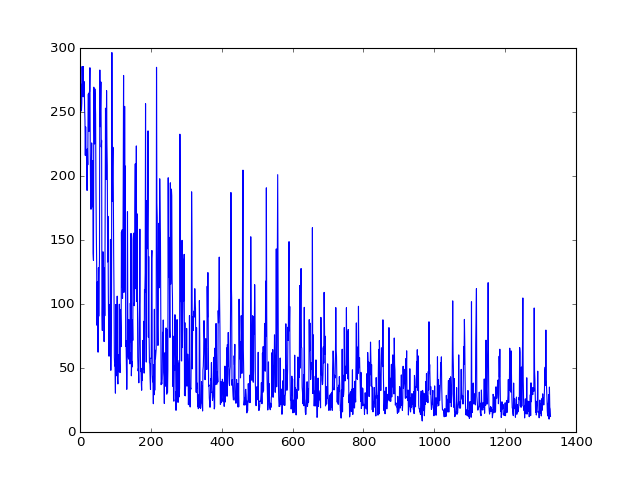

In [52]:
fig = plt.figure()
plt.plot(tdata['train_err'][5:])

In [ ]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf
odir = 'results/headResults/MRF_side/'


# conf = sideconf
conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[2,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,3])

self.val_cursor.first()
for count in range(numex):
    self.updateFeedDict(self.DBType.Val)
    curpred = sess.run([self.basePred,self.mrfPred],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    all_preds[count,:,:,:,1] = curpred[1]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = PoseTools.getBasePredLocs(curpred[1],conf)[0,:,:]
    predLocs[count,:,:,2] = self.locs[0,:,:]
    ims[count,:,:] = self.xs[0,0,:,:]

In [ ]:
diff = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
bname = odir + 'MRF_impact_dmaxMRFLabel_%d.png'
dd = np.squeeze(np.apply_over_axes(np.sum,diff,[1,2]))
oo = dd.argsort()
# diffb = (predLocs[:,:,:,0]-predLocs[:,:,:,2])**2
# diffm = (predLocs[:,:,:,1]-predLocs[:,:,:,2])**2
# ddb = np.squeeze(np.apply_over_axes(np.sum,diffb,[1,2])) 
# ddm = np.squeeze(np.apply_over_axes(np.sum,diffm,[1,2])) 
# # oo = (ddb-ddm).argsort()
# # bname = odir + 'MRF_impact_maxImprovement_%d.png'
# oo = (ddm-ddb).argsort()
# bname = odir + 'MRF_impact_minImprovement_%d.png'
print dd[oo[-4:-1]]
print dd[oo[:3]]
nc = 2
nr = 3
for ndx in range(1,20):
    curi = oo[-ndx]
    aa1 = PoseTools.createPredImage(all_preds[curi,:,:,:,0],conf.n_classes)
    aa2 = PoseTools.createPredImage(2*all_preds[curi,:,:,:,1]-1,conf.n_classes)
    fig = plt.figure(figsize=(10,6))
    ax2 = fig.add_subplot(nc,nr,1)
    ax2.set_title('blank')
    ax2.axis('off')
    ax1 = fig.add_subplot(nc,nr,3)
    ax1.imshow(aa1)
    ax1.axis('off')
    ax1.set_title('base scores')
    ax2 = fig.add_subplot(nc,nr,2)
    ax2.imshow(aa2)
    ax2.axis('off')
    ax2.set_title('mrf scores')
    ax3 = fig.add_subplot(nc,nr,4)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,2],predLocs[curi,:,1,2], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Label')
    ax3 = fig.add_subplot(nc,nr,5)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,1],predLocs[curi,:,1,1], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('MRF')
    ax3 = fig.add_subplot(nc,nr,6)
    ax3.imshow(ims[curi,:,:],cmap=cm.gray)
    ax3.scatter(predLocs[curi,:,0,0],predLocs[curi,:,1,0], #hold=True,
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=10, linewidths=0, edgecolors='face')
    ax3.axis('off')
    ax3.set_title('Base (object detector)')
    plt.show()
    fig.savefig(bname%ndx)

In [ ]:
# classifying a particular frame
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import conf as conf
import myutils

conf.batch_size = 1
conf.useMRF = True
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)


In [ ]:
mov = '/groups/branson/home/kabram/bransonlab/PoseEstimationData/Stephen/7_7_13_47D05AD_81B12DBD_x_Chrimsonattp18/data/fly_0019/fly_0019_trial_002/C002H001S0001/C002H001S0001.avi'
fnum = 200

predPair = [self.mrfPred,self.basePred,self.baseLayers['conv7']]
cap,nframes = PoseTools.openMovie(mov)
im = myutils.readframe(cap,fnum)
im.shape
x0,x1,x2 = PoseTools.processImage(im,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
pred = sess.run(predPair,self.feed_dict)
print fnum
locx = 480
locy = 465

cloc = conf.cropLoc[im.shape[0:2]]
print cloc
ftrloc = ((locx-cloc[0])/conf.pool_scale,(locy-cloc[1])/conf.pool_scale)
print ftrloc

predImg = PoseTools.createPredImage(pred[0][0,:,:,:]*2-1,conf.n_classes)
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,3,1)
sish(predImg,ax1)
ax2 = fig.add_subplot(1,3,2,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[0][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
ax2 = fig.add_subplot(1,3,3,sharex=ax1,sharey=ax1)
chn = 2
sish(pred[1][0,:,:,chn],ax2)
ax2.scatter(ftrloc[0],ftrloc[1])
print pred[0][0,:,:,chn].max(), pred[0][0,:,:,chn].min()
print pred[1][0,:,:,chn].max(), pred[1][0,:,:,chn].min()
plt.show()
fig = plt.figure(figsize = (5,5))
ish(im)
plt.scatter(locx,locy,hold=True)
selftr = pred[2][0,ftrloc[1],ftrloc[0],:]


In [ ]:
from scipy.spatial import distance
import sys
self.openDBs()
self.createCursors()

numtr = self.env.stat()['entries']
tr_preds = np.zeros([numtr,]+self.basePred.get_shape().as_list()[1:]+[2,])
tr_maxsc = np.zeros([numtr,conf.n_classes])
tr_ims = np.zeros((numtr,)+conf.imsz)
tr_pred_locs = np.zeros([numtr,conf.n_classes,2,2])

self.train_cursor.first()
dmat = np.zeros((numtr,128,128))
for count in range(numtr):
    self.updateFeedDict(self.DBType.Train)
    curpred = sess.run([self.basePred,self.baseLayers['conv7']],feed_dict = self.feed_dict)
    tr_preds[count,:,:,:,0] = curpred[0]
    tr_maxsc[count,:] = curpred[0][0,:,:,:].max(axis=1).max(axis=0)
    curlocs = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    tr_pred_locs[count,:,:,0] = curlocs
    tr_pred_locs[count,:,:,1] = self.locs[0,:,:]
    tr_ims[count,:,:] = self.xs[0,0,:,:]
    curftr = curpred[1][0,:,:,:]
    dmat[count,:,:] = np.sum(np.abs(selftr-curftr),2)
    if count%10==0:
        sys.stdout.write('.')
    if count%100==0:
        sys.stdout.write('\n')
                        

In [ ]:
oo = np.argsort(dmat.flatten())
oo.shape
[oi,oy,ox] = np.unravel_index(oo,dmat.shape)
for ndx in range(5):
    print dmat[oi[ndx],oy[ndx],ox[ndx]]

In [ ]:
ncl = 5
fig = plt.figure(figsize = (12,12))
nc = 3
nr = 2
ax0 = fig.add_subplot(nc,nr,1)
sigray(im[256:-256,256:-256,:],ax0)
ax0.scatter(locx-256,locy-256)
for ndx in range(ncl):
    curi = oi[ndx]
    ax = fig.add_subplot(nc,nr,ndx+2,sharex=ax0,sharey=ax0)
    sigray(tr_ims[curi,:,:],ax)
    ax.scatter(tr_pred_locs[curi,:,0,1],tr_pred_locs[curi,:,1,1])
    ax.scatter(ox[ndx]*4,oy[ndx]*4,c='r')

In [ ]:
#POSE EVAL initialize net for debugging
import tensorflow as tf
import os,sys
import caffe
import lmdb
import caffe.proto.caffe_pb2
from caffe.io import datum_to_array
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
import cv2
import tempfile
import copy

from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf


tf.reset_default_graph()

phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)
feed_dict[phDict['phase_train']] = True

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],conf,phDict['phase_train'])

evalSaver = createEvalSaver(conf)
y = phDict['y']
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, y))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
baseNet = PoseTools.createNetwork(conf,1)
l7 = baseNet.baseLayers['conv7']
baseNet.openDBs()
txn = baseNet.env.begin()
valtxn = baseNet.valenv.begin()
sess = tf.InteractiveSession()
baseNet.createCursors(txn,valtxn)


baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
prepareOpt(baseNet,baseNet.DBType.Train,feed_dict,sess,conf,phDict)

In [ ]:
# Check pose eval accuracy interactively
from matplotlib import cm
import poseEval
reload(poseEval)
from poseEval import *

tot = 0
for ii in range(20):
    prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict)
    locs = baseNet.locs
    dd = feed_dict[phDict['lin']]


    cc = tf.nn.softmax_cross_entropy_with_logits(out, y)
    ss = tf.nn.softmax(out)
    [pred,cout,sout,cpred] = sess.run([out,cc,ss,correct_prediction],feed_dict = feed_dict)
    tot = tot + np.count_nonzero(cpred)
print tot/20/88

In [ ]:
#plot the generated points
from matplotlib import cm
import poseEval
reload(poseEval)
from poseEval import *

prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict)
locs = baseNet.locs
dd = feed_dict[phDict['locs']]
print dd.shape

sp = np.random.randint(41)
ini = np.random.randint(8)
print sp,ini
ins = baseNet.xs
plt.gray()
plt.imshow(ins[ini,0,:,:])
plt.scatter(dd[ini*41+sp,:,0],dd[ini*41+sp,:,1], hold=True,
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face')

In [ ]:
# distribution of labeled points
from stephenHeadConfig import conf as conf
import PoseTools
import h5py

L = h5py.File(conf.labelfile,'r')
pts = np.array(L['pts'])[:,:,v,:]
v = conf.view
mm = pts.mean(axis=1)
print mm.shape
zz = pts-mm[:,np.newaxis,...]
smin = zz.min(axis=(0,1))
smax = zz.max(axis=(0,1))
pp =((smax-smin).max()).astype('int')+5
bfilt = np.zeros([pp,pp,5])
zz = zz-smin

for ndx in range(pts.shape[0]):
    for c1 in range(conf.n_classes):
        bfilt[ int(zz[ndx,c1,1])+1,int(zz[ndx,c1,0])+1,c1] += 1
bfilt = (bfilt/pts.shape[0])
bfilt = bfilt/bfilt.max()


fig = plt.figure()
for ndx in range(5):
    ax = fig.add_subplot(2,3,ndx+1)
    ax.imshow(bfilt[:,:,ndx],interpolation='nearest')

import cv2
predscores = bfilt
n_classes = 5
im = np.zeros(predscores.shape[0:2]+(3,))
im[:,:,0] = np.argmax(predscores,2).astype('float32')/(n_classes)*180
im[:,:,1] = (np.max(predscores,2))*255
im[:,:,2] = 255.
im = np.clip(im,0,255)
im = im.astype('uint8')
rimg = cv2.cvtColor(im,cv2.COLOR_HSV2RGB) 
    
fig = plt.figure();
ax = plt.imshow(rimg)
fig.savefig('/home/mayank/Dropbox/talks/labMeetingSep21_extra/joint_dist.png')

In [ ]:
# Pose Eval training
import poseEval
reload(poseEval)
from stephenHeadConfig import conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseEval.train(conf,restore=False)

In [ ]:
# Run pose eval on worst base predictions 

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
self.train_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
for count in range(numex):
    self.updateFeedDict(self.DBType.Train) #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = self.locs[0,:,:] # + 4*np.random.randn(conf.n_classes,2)
     #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    ims[count,:,:] = self.xs[0,0,:,:]
    
    l7 = baseNet.baseLayers['conv7']
    [bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

    neglocs = predLocs[count,:,:,0:1,np.newaxis]
    neglocs = neglocs.transpose([2,0,1,3])
    locs = baseNet.locs
    alllocs = np.concatenate([neglocs,locs[...,np.newaxis]],axis=3)
    alldd = genData(l7out,alllocs,conf)
    alllocs = alllocs.transpose([0,3,1,2])
    alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
    alllocs_m = alllocs.mean(1)
    alllocs = alllocs-alllocs_m[:,np.newaxis,:]

    alldd = alldd.transpose([0,3,1,2])
    alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

    y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
    y[:,:-1,0] = 1. 
    y[:,-1,1] = 1.
    y = np.reshape(y,[-1,y.shape[-1]])

    feed_dict[phDict['y']] = y
    feed_dict[phDict['lin']] = alldd
    feed_dict[phDict['locs']] = alllocs
    
    evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
    totacc = totacc + sess.run(accuracy,feed_dict=feed_dict)
print totacc/numex    

In [ ]:

self.val_cursor.first()
numex = self.env.stat()['entries']
ims = np.zeros( (numex,)+conf.imsz)
locs = np.zeros( (numex,5,2))
for count in range(numex):
    self.updateFeedDict(self.DBType.Train)
    locs[count,:,:] = self.locs[0,:,:] 
    ims[count,:,:] = self.xs[0,:,:] 


In [ ]:
# Run pose eval on eval images with the same negs as training

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors()
numex = self.valenv.stat()['entries']
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
self.train_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
vpred = np.zeros([numex,50,2])
vlocs = np.zeros([numex,50,5,2])
for count in range(5):
    rlocs = prepareOpt(baseNet,baseNet.DBType.Val,feed_dict,sess,conf,phDict) # ATTENTION!!!!!!
    feed_dict[phDict['phase_train']] = False
    feed_dict[phDict['dropout']] = 1
    val_pred = sess.run(out, feed_dict=feed_dict)
    vpred[count,:,:] = val_pred
    ims[count,:,:] = self.xs[0,0,:,:]
    vlocs[count,...] = rlocs

In [ ]:
%pylab notebook
ex = np.random.randint(5)
print ex
for count in range(5):
    fig = plt.figure(figsize=(12,8))
    for ndx in range(10):
        ax = fig.add_subplot(3,4,ndx+1)
        ax.cla()
        ax.imshow(ims[ex,:,:],cmap='gray')
        ax.scatter(vlocs[ex,count*10+ndx,:,0],vlocs[ex,count*10+ndx,:,1],
                    c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                    s=60, linewidths=1, edgecolors='face',alpha=1,marker='+')
        ax.set_title('{:.2f},{:.2f}'.format(vpred[ex,count*10+ndx,0],vpred[ex,count*10+ndx,1]))
        

In [ ]:
sigma = 5*0.5
rlocs = np.round(np.random.normal(size=(1,5,2,12))*sigma)
# remove rlocs that are small.
dlocs = np.sqrt( (rlocs**2).sum(2))
print dlocs.shape
kk = np.any(dlocs>5,1)
print kk
print kk.shape

In [ ]:
print vpred.shape
nn = vpred[:,:30,1].flatten()
plt.hist(nn)
print nn[::5000]
pp = vpred[:,30:,1].flatten()
plt.hist(pp)

In [ ]:
# Run pose eval on worst base predictions 


import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from stephenHeadConfig import sideconf as conf



from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)


self.openDBs()
self.createCursors(sess)
numex = 4086
all_preds = np.zeros([numex,]+self.basePred.get_shape().as_list()[1:]+[1,])
ims = np.zeros((numex,)+conf.imsz)
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(out,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


self.val_cursor.first()
totacc = 0
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.
for count in range(5):
    self.updateFeedDict(self.DBType.Train,sess=sess,distort=False) #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
    all_preds[count,:,:,:,0] = curpred[0]
    predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
    predLocs[count,:,:,1] = self.locs[0,:,:] # + 4*np.random.randn(conf.n_classes,2)
     #!!!!!!!!!!!!! ATTENTION !!!!!!!!!!!!!!!!
    ims[count,:,:] = self.xs[0,0,:,:]
    
    l7 = baseNet.baseLayers['conv7']
    [bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

    neglocs = predLocs[count,:,:,0:1,np.newaxis]
    neglocs = neglocs.transpose([2,0,1,3])
    locs = baseNet.locs
    alllocs = np.concatenate([neglocs,locs[...,np.newaxis]],axis=3)
    alldd = genData(l7out,alllocs,conf)
    alllocs = alllocs.transpose([0,3,1,2])
    alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
    alllocs_m = alllocs.mean(1)
    alllocs = alllocs-alllocs_m[:,np.newaxis,:]

    alldd = alldd.transpose([0,3,1,2])
    alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

    y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
    y[:,:-1,0] = 1. 
    y[:,-1,1] = 1.
    y = np.reshape(y,[-1,y.shape[-1]])

    feed_dict[phDict['y']] = y
    feed_dict[phDict['lin']] = alldd
    feed_dict[phDict['locs']] = alllocs
    
    evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
    totacc = totacc + sess.run(accuracy,feed_dict=feed_dict)
print totacc/numex    

In [ ]:
%pylab notebook
diff = (predLocs[:,:,:,0]-predLocs[:,:,:,1])**2
dd = np.squeeze(np.sqrt(np.apply_over_axes(np.sum,diff,[1,2])))
oo = dd.argsort()
oo = np.flipud(oo)

jj = evalScores[:,0,1]
oo = jj.argsort()

ndx = np.random.randint(7)
for ndx in range(16):
    curidx = oo[ndx]
    fig = plt.figure()
    ax = fig.add_subplot(231)
    ax.cla()
    ax.imshow(ims[curidx,:,:],cmap='gray')
    ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0],
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=60, linewidths=1, edgecolors='face',alpha=1,marker='+')
    ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
                c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
                s=20, linewidths=0, edgecolors='face')
    ax.set_title('Lab(o):{:.2f}, Pred(+):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
    for pp in range(5):
        ax = fig.add_subplot(2,3,pp+2)
        ax.cla()
        ax.imshow(all_preds[curidx,:,:,pp,0],interpolation='nearest')
        ax.set_title('Max{:.2f},Min{:.2f}'.format(all_preds[curidx,:,:,pp,0].max(),all_preds[curidx,:,:,pp,0].min()))
#     plt.savefig('/home/mayank/work/poseEstimation/results/poseEval/topLabeledScores{}'.format(ndx+1),
#                dpi=200,facecolor='w',transparent=True)

In [ ]:
diff = (predLocs[:,:,:,0]-predLocs[:,:,:,1])**2
dd = np.squeeze(np.sqrt(np.apply_over_axes(np.sum,diff,[1,2])))
oo = dd.argsort()
oo = np.flipud(oo)

dd = dd[oo]
ee = evalScores[oo,:,:]
nsel = 7
plt.scatter(ee[:nsel,0,1],dd[:nsel])
plt.scatter(ee[:nsel,1,1],dd[:nsel],c=[0,1,0],hold=True)
print float(np.count_nonzero(ee[:nsel,1,1]>0))/nsel
print float(np.count_nonzero(ee[:nsel,0,0]>0))/nsel

In [ ]:
# Prepare for eval for movie frames i.e., next cell

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = False
outtype = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.


In [ ]:
# performance of pose eval on frames


mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
fnum = 200

count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
ims = np.zeros([numex,512,512])


cap,nframes = PoseTools.openMovie(mov)
im = myutils.readframe(cap,fnum)

x0,x1,x2 = PoseTools.processImage(im,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2

curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
predLocs[count,:,:,1] = predLocs[count,:,:,0]
# predLocs[count,4,0,1] = 267
# predLocs[count,4,1,1] = 267
# predLocs[count,0,0,1] = 296
# predLocs[count,0,1,1] = 215
# predLocs[count,1,0,1] = 211
# predLocs[count,1,1,1] = 231
ims[count,:,:] = x0[0,:,:,0]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)

neglocs = predLocs[count,:,:,0:1,np.newaxis]
neglocs = neglocs.transpose([2,0,1,3])
locs = predLocs[count,:,:,1:,np.newaxis]
locs = locs.transpose([2,0,1,3])
alllocs = np.concatenate([neglocs,locs],axis=3)
alldd = genData(l7out,alllocs,conf)
alllocs = alllocs.transpose([0,3,1,2])
alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
alllocs_m = alllocs.mean(1)
alllocs = alllocs-alllocs_m[:,np.newaxis,:]

alldd = alldd.transpose([0,3,1,2])
alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
y[:,:-1,0] = 1. 
y[:,-1,1] = 1.
y = np.reshape(y,[-1,y.shape[-1]])

feed_dict[phDict['y']] = y
feed_dict[phDict['lin']] = alldd
feed_dict[phDict['locs']] = alllocs

evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)

curidx = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.flipud(ims[curidx,:,:]),cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face',alpha=0.4)
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=10, linewidths=0, edgecolors='face')
ax.set_title('Dark (Labeled):{:.2f}, Light (Predicted):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
print predLocs[0,...]
# plt.savefig('/home/mayank/work/poseEstimation/results/poseEval/fly245_failures{}'.format(fnum+1),
#            dpi=200)

In [ ]:
# performance of pose eval on frames
%pylab notebook
import copy
# mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
# fnum = 721
mov = '/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi'
fnum = 405

cap,nframes = PoseTools.openMovie(mov)
im1 = myutils.readframe(cap,fnum)
fnum = 582
im2 = myutils.readframe(cap,fnum)

ra = 0.16
dd = im1.astype('double') - im2.astype('double')
# im1 = ( im1.astype('double') + ra*dd).astype('uint8')

count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
ims = np.zeros([numex,512,512])
all_preds = np.zeros([2,128,128,5])



x0,x1,x2 = PoseTools.processImage(im1,conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
x01= x0
    
curpred = sess.run([self.basePred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
# predLocs[count,:,:,1] =  np.array([[276,320],[205,285],[276,276],[240,248],[228,328]])
predLocs[count,:,:,1] = [[394,358],[ 332,336], [407,321], [351,294], [357,374]]
predLocs[count,:,:,1] -= [128,0]

# predLocs[count,:,:,0] = predLocs[count,:,:,1] + 4*np.random.randn(5,2)
# predLocs[count,:,:,1] =  np.array([[284,228],[209,235],[253,182],[210,190],[272,252]])
# predLocs[count,:,:,1] = predLocs[count,:,:,0]
ims[count,:,:] = x0[0,:,:,0]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out1 = l7out
all_preds[0,...] = bout

x0,x1,x2 = PoseTools.processImage(im2,conf)
x02 = x0
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out2 = l7out
all_preds[1,...] = bout

neglocs = predLocs[count,:,:,0:1,np.newaxis]
neglocs = neglocs.transpose([2,0,1,3])
locs = predLocs[count,:,:,1:,np.newaxis]
locs = locs.transpose([2,0,1,3])
alllocs = np.concatenate([neglocs,locs],axis=3)
alldd1 = genData(l7out1,alllocs,conf)
alldd2 = genData(l7out2,alllocs,conf)

# alldd_mixed = copy.deepcopy(alldd1)
# selpt = np.array([0,1,2,3,4])
# alldd_mixed[:,selpt,:,:] = alldd2[:,selpt,:,:]
# alldd = alldd_mixed.transpose([0,3,1,2])

alldd = alldd1.transpose([0,3,1,2])
alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

# alldd = alldd[ [1,0],:,:] # ATTENTION!!!!!!!!!!!!!
swapdim = [] # ATTENTION!!!!!!!!!!!!!
for ss in swapdim:
    alldd[:,ss,:] = alldd[[1,0],ss,:]

alllocs = alllocs.transpose([0,3,1,2])
alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
print alllocs
alllocs_m = alllocs.mean(1)
alllocs = alllocs-alllocs_m[:,np.newaxis,:]

y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
y[:,:-1,0] = 1. 
y[:,-1,1] = 1.
y = np.reshape(y,[-1,y.shape[-1]])

feed_dict[phDict['y']] = y
feed_dict[phDict['lin']] = alldd
feed_dict[phDict['locs']] = alllocs

evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)

curidx = 0
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(231)
ax.imshow(x01[0,:,:,0],cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=40, linewidths=1, edgecolors='face',marker='+')
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=20, linewidths=0, edgecolors='face')
ax.set_title('o(Lab):{:.2f}, +(Pred):{:.2f}'.format(evalScores[curidx,1,1],evalScores[curidx,0,1]))
for pp in range(5):
    ax = fig.add_subplot(2,3,pp+2)
    ax.imshow(all_preds[0,:,:,pp],interpolation='nearest')
    ax.set_title('max:{:.2f},min:{:.2f}'.format(all_preds[0,:,:,pp].max(),all_preds[0,:,:,pp].min()))
# print predLocs[0,...]
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.imshow(((x01[0,...,0].astype('double')-x02[0,...,0].astype('double')))/40+0.5,cmap='gray')


In [ ]:
kk= alldd1-alldd2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(kk[0,...,0],interpolation='nearest')
ax.set_aspect(100)
vvl7 = l7out.var(1).var(1).squeeze()
print vvl7.shape
print alldd1.shape
gg = kk[...,0]/vvl7
ax = fig.add_subplot(111)
imx = ax.imshow(gg[0,...],interpolation='nearest')
ax.set_aspect(100)
imx.colorbar

In [ ]:
# Prepare for eval for movie frames i.e., next cell

import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from matplotlib import cm
from batch_norm import batch_norm
import myutils
import PoseTools
import localSetup
import operator
import poseEval
reload(poseEval)
from poseEval import *
from stephenHeadConfig import conf

tf.reset_default_graph()

conf.batch_size = 1
conf.useMRF = True # ATTENTION! !!!!!!!!!!!!
outtype = 2

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()

baseNet = self
phDict = createEvalPH(conf)
feed_dict = createFeedDict(phDict)

with tf.variable_scope('poseEval'):
    out,layer_dict = poseEvalNet(phDict['lin'],phDict['locs'],
                                 conf,phDict['phase_train'],
                                 phDict['dropout'])

evalSaver = createEvalSaver(conf)
y = phDict['y']

baseNet.restoreBase(sess,True)
baseNet.restoreMRF(sess,True)
didRestore,startat = restoreEval(sess,conf,evalSaver,restore=True)
baseNet.initializeRemainingVars(sess)
feed_dict[phDict['phase_train']] = False
feed_dict[phDict['dropout']] = 1.


In [ ]:
# performance of pose eval on frames
%pylab notebook
import copy
# mov = '/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi'
# fnum = 713
mov = '/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi'
fnum = 405
cap,nframes = PoseTools.openMovie(mov)
im1 = myutils.readframe(cap,fnum)


count = 0
numex = 1
predLocs = np.zeros([numex,conf.n_classes,2,2])
evalScores = np.zeros([numex,2,2])
all_preds = np.zeros([2,128,128,5])
import cv2
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10,10))
# im1 = clahe.apply(im1[:,:,:1])
im1 = im1[:,:,0]
x0,x1,x2 = PoseTools.processImage(im1[:,:,np.newaxis],conf)
self.feed_dict[self.ph['x0']] = x0
self.feed_dict[self.ph['x1']] = x1
self.feed_dict[self.ph['x2']] = x2
x01 = x0
    
curpred = sess.run([self.mrfPred,],feed_dict = self.feed_dict)
predLocs[count,:,:,0] = PoseTools.getBasePredLocs(curpred[0],conf)[0,:,:]
# predLocs[count,:,:,1] =  np.array([[276,300-4*0],[208-4*0,284+4*0],[271-4*0,255-4*0],[238-4*0,258+4*0],[236+4*0,324+4*0]])
predLocs[count,:,:,1] = [[394,358],[ 332,336], [407,321], [351,294], [357,374]]
predLocs[count,:,:,1] -= [128,0]
print predLocs[...,0]
print predLocs[...,1]

l7 = baseNet.baseLayers['conv7']
[bout,l7out] = sess.run([baseNet.basePred,l7],feed_dict=baseNet.feed_dict)
l7out1 = l7out
all_preds[0,...] = bout

fig = plt.figure()
for selpt in range(5):
    rr = 5
    ssImg = np.zeros([2*rr+1,2*rr+1])
    for xx in range(-rr,rr+1):
        for yy in range(-rr,rr+1):
            neglocs = predLocs[count,:,:,0:1,np.newaxis]
            neglocs = neglocs.transpose([2,0,1,3])
            locs = copy.deepcopy(predLocs[count,:,:,1:,np.newaxis])
            locs[selpt,0] = locs[selpt,0]+4*xx
            locs[selpt,1] = locs[selpt,1]+4*yy
            locs = locs.transpose([2,0,1,3])
            alllocs = np.concatenate([neglocs,locs],axis=3)

            alldd1 = genData(l7out1,alllocs,conf)
            alldd = alldd1.transpose([0,3,1,2])
            alldd = np.reshape(alldd,[-1,alldd.shape[-2],alldd.shape[-1]])

            alllocs = alllocs.transpose([0,3,1,2])
            alllocs = alllocs.reshape((-1,)+alllocs.shape[2:])
            alllocs_m = alllocs.mean(1)
            alllocs = alllocs-alllocs_m[:,np.newaxis,:]

            y = np.zeros([l7out.shape[0],alllocs.shape[-1],2])
            y[:,:-1,0] = 1. 
            y[:,-1,1] = 1.
            y = np.reshape(y,[-1,y.shape[-1]])

            feed_dict[phDict['y']] = y
            feed_dict[phDict['lin']] = alldd
            feed_dict[phDict['locs']] = alllocs

            evalScores[count,:,:] = sess.run(out,feed_dict=feed_dict)
            ssImg[yy+rr,xx+rr] = evalScores[count,1,1]

    curidx = 0
    ax = fig.add_subplot(2,3,selpt+1)
    ax.imshow(ssImg,interpolation='nearest')
    idx = np.flipud(np.unravel_index(ssImg.argmax(), ssImg.shape))
    ax.set_title('{:}'.format(np.array(idx)-rr))
fig2 = plt.figure(figsize=(12,8))
ax = fig2.add_subplot(231)
ax.imshow(x01[0,:,:,0],cmap='gray')
ax.scatter(predLocs[curidx,:,0,0],predLocs[curidx,:,1,0], 
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=40, linewidths=1, edgecolors='face',marker='+')
ax.scatter(predLocs[curidx,:,0,1],predLocs[curidx,:,1,1],
            c=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes)),
            s=20, linewidths=0, edgecolors='face')
ax.set_title('o(Lab):{:.2f}, +(Pred):{:.2f}'.format(ssImg[rr,rr],evalScores[curidx,0,1]))
for pp in range(5):
    ax = fig2.add_subplot(2,3,pp+2)
    ax.imshow(all_preds[0,:,:,pp],interpolation='nearest')
    ax.set_title('max:{:.2f},min:{:.2f}'.format(all_preds[0,:,:,pp].max(),all_preds[0,:,:,pp].min()))
fig = plt.figure()
imshow(x01[0,...,0],cmap='gray')

In [ ]:
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from cvc import cvc


# For FRONT
from stephenHeadConfig import conf as conf
conf.useMRF = True
outtype = 2
extrastr = ''

# conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

valmovies = ['/home/mayank/work/PoseEstimationData/Stephen/fly245/fly245_300ms_stimuli/C002H001S0008/C002H001S0008_c.avi']
for ndx in range(len(valmovies)):
    mname,_ = os.path.splitext(os.path.basename(valmovies[ndx]))
    oname = re.sub('!','__',conf.getexpname(valmovies[ndx]))
#     pname = '/groups/branson/home/kabram/bransonlab/PoseTF/results/headResults/movies/' + oname + extrastr
    pname = '/home/mayank/work/poseEstimation/results/poseEval/' + oname + extrastr
    if os.path.isfile(pname + '.mat') and not redo:
        continue
        

    if not os.path.isfile(valmovies[ndx]):
        continue
    
    predList = PoseTools.classifyMovie(conf,valmovies[ndx],outtype,self,sess)
    PoseTools.createPredMovie(conf,predList,valmovies[ndx],pname + '.avi',outtype)


    cap = cv2.VideoCapture(valmovies[ndx])
    height = int(cap.get(cvc.FRAME_HIEGHT))
    width = int(cap.get(cvc.FRAME_WIDTH))
    orig_crop_loc = conf.cropLoc[(height,width)]
    crop_loc = [x/4 for x in orig_crop_loc] 
    end_pad = [height/4-crop_loc[0]-conf.imsz[0]/4,width/4-crop_loc[1]-conf.imsz[1]/4]
    pp = [(0,0),(crop_loc[0],end_pad[0]),(crop_loc[1],end_pad[1]),(0,0),(0,0)]
    predScores = np.pad(predList[1],pp,mode='constant',constant_values=-1.)

    predLocs = predList[0]
    predLocs[:,:,:,0] += orig_crop_loc[1]
    predLocs[:,:,:,1] += orig_crop_loc[0]
    
    io.savemat(pname + '.mat',{'locs':predLocs,'scores':predScores[...,0],'expname':valmovies[ndx]})
    print 'Done:%s'%oname



print pp
print predList[1].shape

In [ ]:
self.openDBs()
self.createCursors()

In [ ]:
self.updateFeedDict(self.DBType.Train,distort=False)

import copy
import PoseTools
reload(PoseTools)

import stephenHeadConfig
reload(stephenHeadConfig)
from stephenHeadConfig import conf as conf
oldxs = copy.deepcopy(self.xs)
oldl = copy.deepcopy(self.locs)

xs = self.xs
locs = self.locs
if conf.horzFlip:
    xs,locs = PoseTools.randomlyFlipLR(xs,locs)
if conf.vertFlip:
    xs,locs = PoseTools.randomlyFlipUD(xs,locs)
xs,locs = PoseTools.randomlyRotate(xs,locs,conf)
xs = PoseTools.randomlyAdjust(xs,conf)

for ndx in range(self.xs.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(oldxs[ndx,0,...],cmap='gray')
    ax.scatter(oldl[ndx,:,0],oldl[ndx,:,1])
    
    ax = fig.add_subplot(122)
    ax.imshow(self.xs[ndx,0,...],cmap='gray')
    ax.scatter(self.locs[ndx,:,0],self.locs[ndx,:,1])

In [ ]:
import copy
import PoseTools
reload(PoseTools)
oldxs = copy.deepcopy(self.xs)
oldl = copy.deepcopy(self.locs)

xs = self.xs
locs = self.locs
if conf.horzFlip:
    xs,locs = PoseTools.randomlyFlipLR(xs,locs)
if conf.vertFlip:
    xs,locs = PoseTools.randomlyFlipUD(xs,locs)
xs,locs = PoseTools.randomlyRotate(xs,locs,conf)
xs = PoseTools.randomlyAdjust(xs,conf)

for ndx in range(self.xs.shape[0]):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(oldxs[ndx,0,...],cmap='gray')
    ax.scatter(oldl[ndx,:,0],oldl[ndx,:,1])
    
    ax = fig.add_subplot(122)
    ax.imshow(self.xs[ndx,0,...],cmap='gray')
    ax.scatter(self.locs[ndx,:,0],self.locs[ndx,:,1])

In [ ]:
# Impact of dropout on base
import localSetup
import PoseTools
reload(PoseTools)
import multiResData
reload(multiResData)
import os
import re
import tensorflow as tf
from scipy import io
from cvc import cvc


# For FRONT
from stephenHeadConfig import conf as conf
conf.useMRF = False
outtype = 1
extrastr = ''

conf.batch_size = 1

self = PoseTools.createNetwork(conf,outtype)
sess = tf.InteractiveSession()
PoseTools.initNetwork(self,sess,outtype)

from scipy import io
import cv2

self.openDBs()
self.createCursors()

l7 = self.baseLayers['conv7']
with tf.variable_scope('base/layer8') as scope:
    scope.reuse_variables()
    l7_do = tf.nn.dropout(l7,self.ph['keep_prob'],[conf.batch_size,1,1,conf.nfcfilt])
    l8_weights = tf.get_variable("weights", [1,1,conf.nfcfilt,conf.n_classes],
        initializer=tf.random_normal_initializer(stddev=0.01))
    l8_biases = tf.get_variable("biases", conf.n_classes,
        initializer=tf.constant_initializer(0))
    l8 = tf.nn.conv2d(l7_do,l8_weights,strides=[1,1,1,1],padding='SAME')+l8_biases



In [ ]:
self.updateFeedDict(self.DBType.Train,distort=False)

self.feed_dict[self.ph['phase_train_base']] = False
self.feed_dict[self.ph['phase_train_fine']] = False
self.feed_dict[self.ph['keep_prob']] = 0.1

outpred = sess.run([self.basePred,l8,l7_do,l7],feed_dict=self.feed_dict)
fig = plt.figure(figsize=(8,15))
ax = fig.add_subplot(4,3,1)
ax.imshow(self.xs[0,0,...],cmap='gray')
ax.scatter(self.locs[0,:,0],self.locs[0,:,1])
predLocs = PoseTools.getBasePredLocs(outpred[1],conf)[0,:,:]
ax = fig.add_subplot(4,3,7)
ax.imshow(self.xs[0,0,...],cmap='gray')
ax.scatter(predLocs[:,0],predLocs[:,1])
for ndx in range(5):
    ax = fig.add_subplot(4,3,ndx+2)
    kk = outpred[0][0,...,ndx]
    ax.imshow(outpred[0][0,...,ndx])
    ax.axis('off')
    ax.set_title('{:.2f},{:.2f}'.format(kk.max(),kk.min()))
    ax = fig.add_subplot(4,3,ndx+6+2)
    kk = outpred[1][0,...,ndx]
    ax.imshow(kk)
    ax.axis('off')
    ax.set_title('{:.2f},{:.2f}'.format(kk.max(),kk.min()))

In [ ]:
# Pose Gen training
import poseGen
reload(poseGen)
import stephenHeadConfig

reload(stephenHeadConfig)
from stephenHeadConfig import conf as conf
import tensorflow as tf
tf.reset_default_graph()
poseGen.train(conf,restore=False)

In [ ]:
# test pose gen
import poseGen
reload(poseGen)
import PoseTools
from stephenHeadConfig import conf as conf
import tensorflow as tf

tf.reset_default_graph()

phDict = poseGen.createGenPH(conf)
feed_dict = poseGen.createFeedDict(phDict)
feed_dict[phDict['phase_train']] = True
feed_dict[phDict['dropout']] = 0.5
feed_dict[phDict['y']] = np.zeros((conf.batch_size,conf.n_classes*2))
baseNet = PoseTools.createNetwork(conf,1)
l8 = poseGen.addDropoutLayer(baseNet,phDict['dropout'],conf)
with tf.variable_scope('poseGen'):
    out,out_m,layer_dict = poseGen.poseGenNet(phDict['locs'],phDict['scores'],l8,
                                 conf,baseNet,phDict['phase_train'])

genSaver = poseGen.createGenSaver(conf)
y = phDict['y']
loss = tf.nn.l2_loss(out-y)
in_loss = tf.nn.l2_loss(out-tf.reshape(phDict['locs'],[-1,2*conf.n_classes]))
baseNet.openDBs()
baseNet.feed_dict[phDict['dropout']] = feed_dict[phDict['dropout']]


txn = baseNet.env.begin() 
valtxn = baseNet.valenv.begin()
sess = tf.InteractiveSession()

baseNet.createCursors()
baseNet.restoreBase(sess,True)
didRestore,startat = poseGen.restoreGen(sess,conf,genSaver,True)

baseNet.initializeRemainingVars(sess)

In [ ]:
import poseGen
reload(poseGen)
mpred,lpred = poseGen.prepareOpt(baseNet,l8,baseNet.DBType.Val,feed_dict,sess,conf,
                                 phDict,distort=True)

x = baseNet.xs
l = baseNet.locs
bout = sess.run(l8,feed_dict=baseNet.feed_dict)
predlocs = PoseTools.getBasePredLocs(bout,conf)
in_l = feed_dict[phDict['locs']] + mpred[:,np.newaxis,:]
out_l,out_lm = sess.run([out,out_m],feed_dict=feed_dict)
out_l = np.reshape(out_l,[conf.batch_size*10,5,2]) + out_lm[:,np.newaxis,:] + mpred[:,np.newaxis,:]

ccc=cm.hsv(np.linspace(0,1-1./conf.n_classes,conf.n_classes))
         
idx = np.random.randint(conf.batch_size)

for idx in range(conf.batch_size):
    fig = plt.figure(figsize=[12,12])
    ax = fig.add_subplot(3,4,1)
    ax.imshow(x[idx,0,...],cmap='gray')
    ax.scatter(l[idx,:,0],l[idx,:,1],c=ccc)
    ax.set_title('Label')
    
    ax = fig.add_subplot(3,4,2)
    ax.imshow(x[idx,0,...],cmap='gray')
    ax.scatter(predlocs[idx,:,0],predlocs[idx,:,1],c=ccc)
    ax.set_title('prediction')

    for ix in range(10):

        ax = fig.add_subplot(3,4,ix+3)
        ax.imshow(x[idx,0,...],cmap='gray')
        ax.scatter(out_l[idx*10+ix,:,0],out_l[idx*10+ix,:,1],c=ccc,
                   edgecolors=None,marker='+',s=50)
        ax.scatter(in_l[idx*10+ix,:,0],in_l[idx*10+ix,:,1],c=ccc,edgecolors='face',s=10)
        ax.set_title('Dots:Inputs,+:Output')
        
    fig.savefig('/home/mayank/work/poseEstimation/results/headResults/poseGen/meanAndPointsGen{:d}.png'.format(idx+1))
# fig = plt.figure()
# for ndx in range(5):
#     ax = fig.add_subplot(2,3,ndx+1)
#     ax.imshow(bout[0,...,ndx])
#     ax.scatter(l[0,ndx,0]/4,l[0,ndx,1]/4)
#     ax.set_title('{:.2f}'.format(np.max(bout[0,...,ndx]) ))



In [ ]:
# check gradients

import poseGen
reload(poseGen)
from poseGen import *
from stephenHeadConfig import conf as conf
import re


tf.reset_default_graph()
restore = False
phDict = createGenPH(conf)
feed_dict = createFeedDict(phDict)
feed_dict[phDict['phase_train']] = True
feed_dict[phDict['dropout']] = 0.02
feed_dict[phDict['y']] = np.zeros((conf.batch_size,conf.n_classes*2))
baseNet = PoseTools.createNetwork(conf,1)
l8 = addDropoutLayer(baseNet,phDict['dropout'],conf)
with tf.variable_scope('poseGen'):
    out,layer_dict = poseGenNet(phDict['locs'],phDict['scores'],l8,
                                 conf,baseNet,phDict['phase_train'])

genSaver = createGenSaver(conf)
y = phDict['y']
loss = tf.nn.l2_loss(out-y)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)
baseNet.openDBs()
baseNet.feed_dict[phDict['dropout']] = feed_dict[phDict['dropout']]

txn = baseNet.env.begin()
valtxn = baseNet.valenv.begin()
sess = tf.InteractiveSession()

baseNet.createCursors()
baseNet.restoreBase(sess,True)
didRestore,startat = restoreGen(sess,conf,genSaver,restore)
baseNet.initializeRemainingVars(sess)

posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
for ndx in range(len(uu)):
    vvar = uu[ndx].std()
    print '{:30}:{:.2e}'.format(posevars[ndx].name,
          vvar)

prepareOpt(baseNet,l8,baseNet.DBType.Train,feed_dict,sess,conf,
           phDict,distort=True)
feed_dict[phDict['phase_train']] = True
sess.run(train_step, feed_dict=feed_dict)

posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
ll = tf.gradients(loss,posevars)        
gg = sess.run(ll,feed_dict=feed_dict)
for ndx,curg in enumerate(gg):
    gvar = curg.std()
    vvar = uu[ndx].std()
    print '{:30}:{:.2e},{:.2e},{:.2e}'.format(posevars[ndx].name,
          vvar,gvar,vvar/gvar)
    
for step in range(25):
    prepareOpt(baseNet,l8,baseNet.DBType.Train,feed_dict,sess,conf,
               phDict,distort=True)
    feed_dict[phDict['phase_train']] = True
    sess.run(train_step, feed_dict=feed_dict)


posevars = []
uu = []
for vv in tf.all_variables():
    if vv.name[:7] == 'poseGen' and not re.search('batch_norm',vv.name) \
    and not re.search('Adam',vv.name) and not re.search('biases',vv.name):
        posevars.append(vv)
        uu.append(vv.eval())
ll = tf.gradients(loss,posevars)        
gg = sess.run(ll,feed_dict=feed_dict)
for ndx,curg in enumerate(gg):
    gvar = curg.std()
    vvar = uu[ndx].std()
    print '{:30}:{:.2e},{:.2e},{:.2e}'.format(posevars[ndx].name,
          vvar,gvar,vvar/gvar)

In [4]:
# testing tfrecord

# writing
import myutils
import PoseTools
import os
import tensorflow as tf

def _int64_feature(value):
    if not isinstance(value,(list,np.ndarray)):
        value = [value]
    return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

def _float_feature(value):
    if not isinstance(value,(list,np.ndarray)):
        value = [value]
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

def _bytes_feature(value):
    if not isinstance(value,list):
        value = [value]
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=value))

/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/mayank/work/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


In [ ]:
def convert_to(images, labels, name):
    num_examples = labels.shape[0]
    if images.shape[0] != num_examples:
        raise ValueError("Images size %d does not match label size %d." %
                         (images.shape[0], num_examples))
    rows = images.shape[1]
    cols = images.shape[2]
    depth = images.shape[3]

    filename = os.path.join('/tmp', name + '.tfrecords')
    print('Writing', filename)
    writer = tf.python_io.TFRecordWriter(filename)
    for index in range(num_examples):
        image_raw = images[index].tostring()
        example = tf.train.Example(features=tf.train.Features(feature={
            'height': _int64_feature(rows),
            'width': _int64_feature(cols),
            'depth': _int64_feature(depth),
            'label': _int64_feature(int(labels[index])),
            'locs': _float_feature(np.array([0,1.3,2.65,3,4,])),
            'image_raw': _bytes_feature(image_raw)}))
        writer.write(example.SerializeToString())


mov = '/home/mayank/Dropbox/PoseEstimation/Stephen/fly325/C002H001S0020/C002H001S0020_c.avi'
cap,nframes = PoseTools.openMovie(mov)

im = []
for ndx in range(100):
    im.append(myutils.readframe(cap,ndx))
im = np.array(im)
labels = np.arange(100)
print im.shape
convert_to(im,labels,'test1')

In [2]:
import tensorflow as tf
from stephenHeadConfig import conf as conf
import multiResData
reload( multiResData)

# def read_and_decode(filename_queue):
#     reader = tf.TFRecordReader()
#     _, serialized_example = reader.read(filename_queue)
#     features = tf.parse_single_example(
#         serialized_example,
#         features={'image_raw':tf.FixedLenFeature([], dtype=tf.string),
#           'locs':tf.FixedLenFeature(shape=[conf.n_classes,2], dtype=tf.float32),
#           'height':tf.FixedLenFeature([], dtype=tf.int64),
#           'width':tf.FixedLenFeature([], dtype=tf.int64),
#           'depth':tf.FixedLenFeature([], dtype=tf.int64),
#                  })
# #         features={'image_raw':tf.FixedLenFeature([], dtype=tf.string),
# #           'locs':tf.FixedLenFeature(shape=[10,], dtype=tf.float32),
# #          'label':tf.FixedLenFeature([], dtype=tf.int64, default_value=0)})
# #         dense_keys=['image_raw', 'label'],
# #         # Defaults are not specified since both keys are required.
# #         dense_types=[tf.string, tf.int64])
#     # Convert from a scalar string tensor (whose single string has
#     image = tf.decode_raw(features['image_raw'], tf.uint8)

#     image = tf.reshape(image, [512,512,1])
# #     image.set_shape([my_cifar.n_input])

#     # OPTIONAL: Could reshape into a 28x28 image and apply distortions
#     # here.  Since we are not applying any distortions in this
#     # example, and the next step expects the image to be flattened
#     # into a vector, we don't bother.

#     # Convert from [0, 255] -> [-0.5, 0.5] floats.
# #     image = tf.cast(image, tf.float32)
# #     image = tf.cast(image, tf.float32) * (1. / 255) - 0.5

#     # Convert label from a scalar uint8 tensor to an int32 scalar.
#     label = tf.cast(features['height'], tf.int32)
#     locs = tf.cast(features['locs'], tf.float32)

#     return image, label,locs

filename_queue = tf.train.string_input_producer(['cacheHead/train_TF.tfrecords']) #  list of files to read

imo,llo = multiResData.read_and_decode(filename_queue,conf)
sess = tf.InteractiveSession()

coord = tf.train.Coordinator()

threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f9c744e5d50>> ignored


In [29]:
# check if tfrecords are working or not
import PoseTrain
reload(PoseTrain)

self = PoseTrain.PoseTrain(conf)
self.createPH()
self.createFeedDict()
self.feed_dict[self.ph['phase_train_base']] = True
self.feed_dict[self.ph['keep_prob']] = 0.5
doBatchNorm = self.conf.doBatchNorm

self.openDBs()

sess = tf.InteractiveSession()

self.createCursors(sess)


self.updateFeedDict(self.DBType.Val,sess=sess,distort=True)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(self.xs[0,0,...],cmap='gray')
ax.scatter(self.locs[0,:,0],self.locs[0,:,1])


In [ ]:
import PoseRegression
reload(PoseRegression)
from stephenHeadConfig import conf as conf
import tensorflow as tf
import os

tf.reset_default_graph()
pobj = PoseRegression.PoseRegression(conf)
pobj.baseRegress(restore=True)

In [ ]:
import PoseTools
reload(PoseTools)
from stephenHeadConfig import conf as conf

locs = [[[254,93],[30,40]],[[80,70],[80,40]]]

imsz = conf.imsz

a,b,c = PoseTools.createRegLabelImages(locs,imsz,4,10)
# plt.figure()
# plt.imshow(a[0,:,:,0],interpolation='nearest')
# plt.figure()
# plt.imshow(b[0,:,:,0],interpolation='nearest')
# plt.figure()
# plt.imshow(c[0,:,:,0],interpolation='nearest')

import tensorflow as tf
sess = tf.InteractiveSession()
gg = tf.constant(a[0,:,:,:])
hh = tf.constant(b[0,:,:,:])
ss = tf.constant(np.ones([128,128,2]))
hh1 = tf.mul(hh-ss,tf.sqrt(tf.maximum(gg/2+0.5,0)))
kk = tf.nn.l2_loss(hh1)
kk1 = kk.eval()
ll1 = hh1.eval()
plt.figure()
plt.imshow(ll1[...,0])
print kk1
vv = (b[0,:,:,:]-1)**2
vv = np.sum( (vv*(a[0,:,:,:]/2+0.5)).flatten())
print vv/2


In [ ]:
#profiling the code


Populating the interactive namespace from numpy and matplotlib


/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


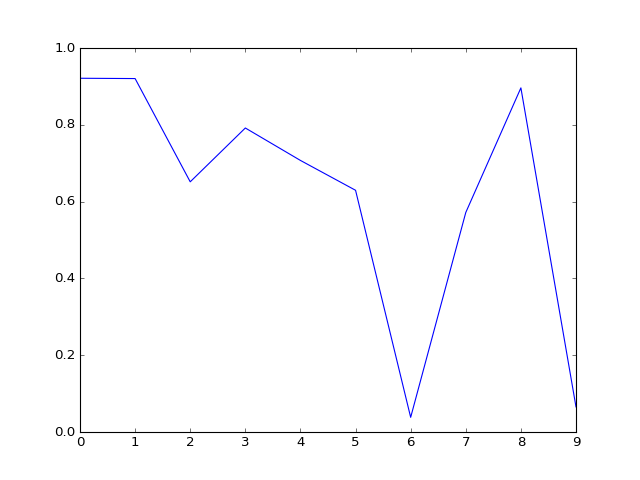

/home/mayank/work/python2_venv/newNumpy/local/lib/python2.7/site-packages/ipywidgets/widgets/widget.py:513: DeprecationWarning: on_trait_change is deprecated: use observe instead
  self.on_trait_change(_validate_border, ['border_width', 'border_style', 'border_color'])


In [5]:
# Interactive plots from
# http://matplotlib.1069221.n5.nabble.com/how-to-create-interactive-plots-in-jupyter-python3-notebook-td46804.html
%pylab notebook
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/ipykernel/.*')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='.*/widgets/.*')

fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

w = widgets.HTML()

def onclick(event):
    w.value = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f'%(
              event.button, event.x, event.y, event.xdata, event.ydata)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
display(w)